In [1]:
import numpy as np
import pandas as pd
import glob 
from skimage import io
import matplotlib.pyplot as plt 
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import pickle as pk
from PIL import Image
import cv2

In [2]:
def getData(path):
    images_list=[]
    for file in glob.glob(path):
        img = io.imread(file, as_gray=True)
        face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        face= face_cascade.detectMultiScale(img, 1.6, 1)[0]
        (x,y,w,h)=face
        img = img[y:y + h, x:x + w] 
        img= np.resize(img,(243,320))
        images_list.append(img) 
    images_list=np.array(images_list)
    reshaped_images_list=images_list.reshape(images_list.shape[0],images_list.shape[1]*images_list.shape[2])
    return reshaped_images_list



## Enterring Data

In [3]:
dataTrain=getData(r"C:\Users\ranah\Downloads\project\dataTrain\train\*.*")
dataTest=getData(r"C:\Users\ranah\Downloads\project\test\*.*")

In [4]:
print(((dataTrain).shape))
print(((dataTest).shape))

(110, 77760)
(15, 77760)


## Add Label Column for DataTest to measure accuracy

In [5]:
y_test=np.array([1,1,1,1,1,1,1,1,1,1,1,0,0,0,0])


In [6]:
#Convert dataTrain to dataFrame
dataTrain = pd.DataFrame(dataTrain)
#Convert dataTest to dataFrame
dataTest = pd.DataFrame(dataTest)

## Scaling

In [7]:
scalar = Normalizer()
#train set
df_scaled = pd.DataFrame(scalar.fit_transform(dataTrain), columns=dataTrain.columns)
df_scaled
#test set
scaled_test= pd.DataFrame(scalar.fit_transform(dataTest), columns=dataTest.columns)
scaled_test

,0,1,2,3,4,5,6,7,8,9,...,77750,77751,77752,77753,77754,77755,77756,77757,77758,77759
0,0.001270,0.001214,0.001129,0.001129,0.001129,0.001101,0.001101,0.001129,0.001214,0.001214,...,0.003246,0.003303,0.003613,0.003867,0.004122,0.004234,0.004206,0.004150,0.004037,0.003924
1,0.007248,0.007248,0.007248,0.007248,0.007248,0.007248,0.006651,0.005571,0.004292,0.002160,...,0.003581,0.003695,0.003894,0.003951,0.003894,0.003837,0.003780,0.003894,0.004036,0.004064
2,0.006273,0.006273,0.006273,0.006273,0.005682,0.003444,0.001992,0.001279,0.001107,0.001082,...,0.000984,0.001304,0.001697,0.002386,0.003099,0.003518,0.003862,0.004231,0.004501,0.004723
3,0.007945,0.007945,0.007945,0.007945,0.007945,0.007945,0.007945,0.007945,0.007945,0.007945,...,0.000312,0.000312,0.000249,0.000125,0.000093,0.000249,0.000312,0.000280,0.000249,0.000187
4,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,0.006562,...,0.003835,0.003937,0.003912,0.003886,0.003886,0.003886,0.003860,0.003937,0.004066,0.004066
5,0.009126,0.009126,0.008911,0.007193,0.002112,0.000608,0.000358,0.000322,0.000322,0.000215,...,0.003471,0.003579,0.003650,0.003865,0.003865,0.003937,0.003972,0.003937,0.003901,0.003865
6,0.007072,0.007072,0.007072,0.007072,0.007072,0.007072,0.007072,0.007072,0.007072,0.007072,...,0.002191,0.002246,0.002246,0.002274,0.002219,0.002163,0.002052,0.002052,0.001997,0.001886
7,0.002870,0.000711,0.000500,0.000448,0.000421,0.000395,0.000316,0.000316,0.000342,0.000421,...,0.003766,0.003792,0.003792,0.003792,0.003871,0.003871,0.003871,0.003924,0.004003,0.004161
8,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,...,0.003245,0.003245,0.003293,0.003388,0.003436,0.003460,0.003484,0.003555,0.003507,0.003603
9,0.007426,0.007426,0.007426,0.007426,0.007426,0.007426,0.007426,0.007426,0.004747,0.002097,...,0.000524,0.000582,0.000641,0.000728,0.000844,0.000932,0.001077,0.001165,0.001340,0.001514


## To select the best number of components

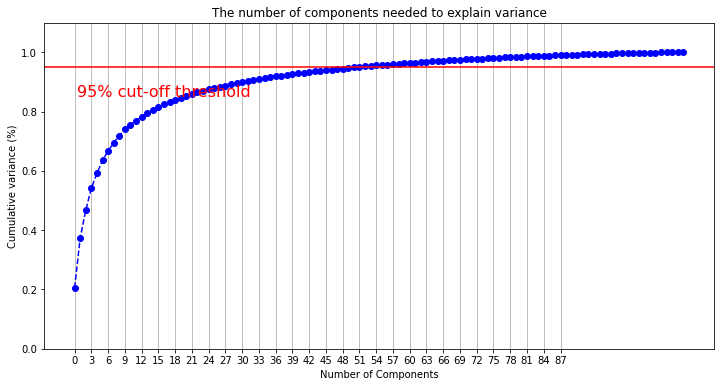

In [9]:
pca = PCA().fit(df_scaled)



plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, df_scaled.shape[0], step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 90, step=3)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## From diagram the best no =50

## Apply PCA for Train set

In [8]:
pca = PCA(n_components = 50)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca = df_pca.to_numpy()
pk.dump(pca, open("pca1.pkl","wb"))
# later reload the pickle file
pca_reload = pk.load(open("pca1.pkl",'rb'))
result_new = pca_reload .transform(df_scaled)

## Apply PCA for Test set

In [9]:
scaled_test.shape

(15, 77760)

In [10]:

test_pca = pd.DataFrame(pca.transform(scaled_test))
test_pca = test_pca.to_numpy()

In [11]:
print("The new size of the train",df_pca.shape)
print("The new size of the test",test_pca.shape)

The new size of the train (110, 50)
The new size of the test (15, 50)


In [12]:
def euclidean_distance(x_test,x_train):
    distance=np.sqrt(np.sum((x_test-x_train)**2))
    return distance


In [13]:
def predict(x_test,x_train) :
    distance=[euclidean_distance(x_test,x_train[i])for i in range(len(x_train))]
    near=np.sort(distance)
    y_pred=int(near[0]<0.23)
    return y_pred

In [14]:
prediction=[]
for i in range(len(test_pca)):
    prediction.append(predict(test_pca[i],df_pca))
accuray=np.mean(y_test==prediction)
print(accuray)
print(prediction)

1.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
